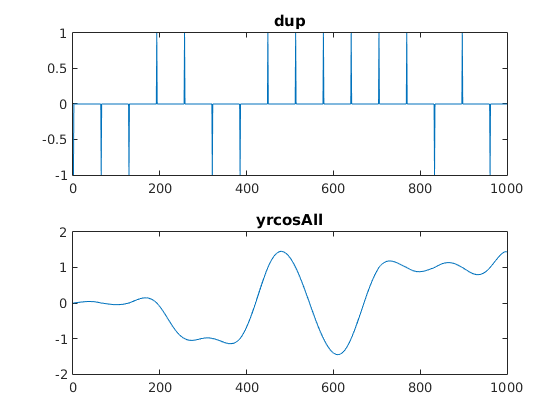

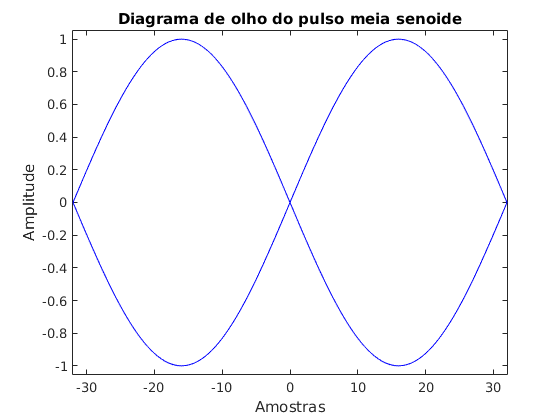

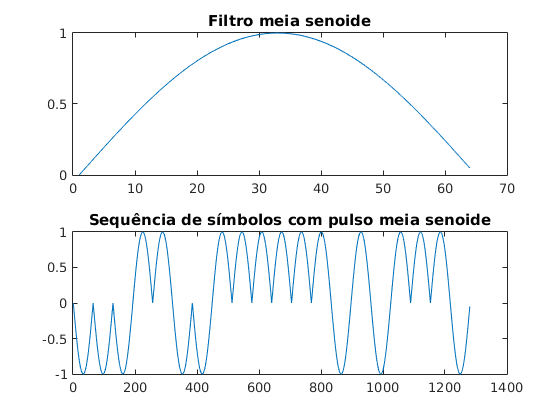

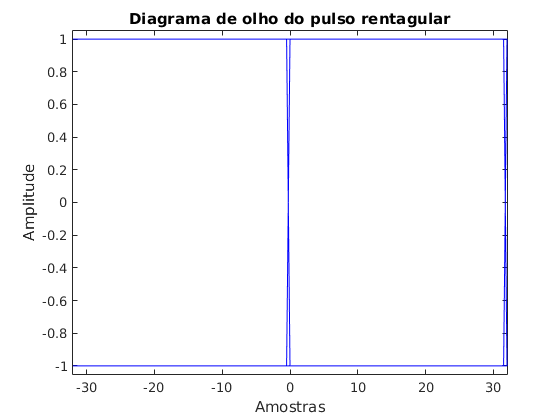

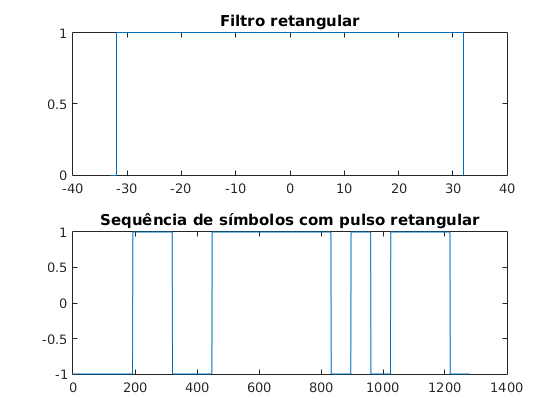

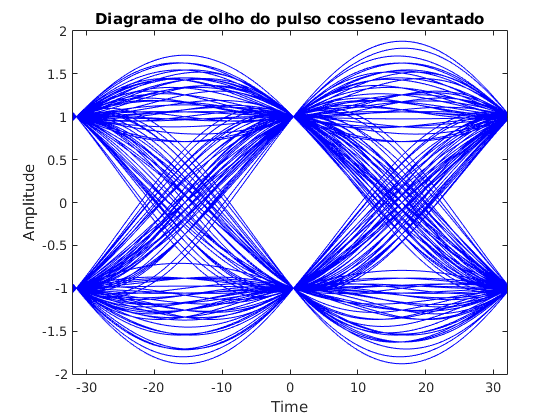

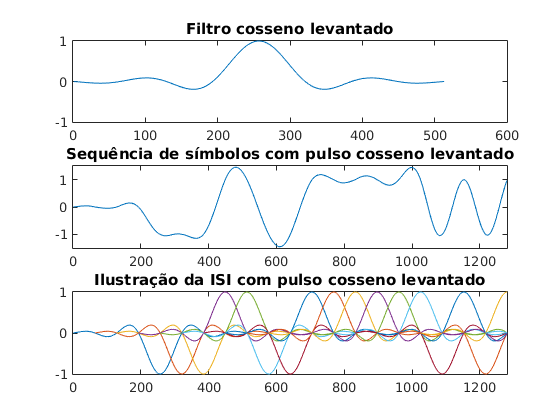

In [10]:
close all;clc;clear all;
% Parâmetros
peSim = 64;                                        % Período do símbolo (amostras/símbolo)
nsCL = 4;                                          % Número de símbolos o cosseno levantado se espalhará (ISI)
roff = 0.25;                                       % Fator de decaimento do cosseno levantado
nSimbs = 400;                                      % Número de símbolos transmitidos 
vtSim = 2*randi([0 1], 1, nSimbs)-1;               % Símbolos
dup = upsample(vtSim,peSim);                       % Símbolos (sobreamostragem)
hrc = rcosfir(roff, nsCL, peSim,1,'normal');       % Cosseno levantado
yrcosAll = conv(dup,hrc);                          % Símbolos transmitidos com o cosseno levantado
yrcos = yrcosAll(2*nsCL*peSim:end-2*nsCL*peSim+1); % Trem de pulso cosseno levantado
% Configuração dos gráficos no tempo
nSim2Plot = 20;                                    % Número de símbolos para o gráfico no tempo
% gráfico pulso cosseno levantado
subplot(3,1,1);
plot(hrc);
title('Filtro cosseno levantado');
subplot(3,1,2);
plot(yrcosAll(1:nSim2Plot*peSim));
title('Sequência de símbolos com pulso cosseno levantado');
axis([0 peSim*nSim2Plot -1.5 1.5]);
subplot(3,1,3);
nRC = length(hrc);
t = 1: nRC;
for ik = 1:nSim2Plot 
    plot(t + (ik-1)*peSim,vtSim(ik)*hrc);
    hold all;
end
axis([0 peSim*nSim2Plot -1 1]);
title('Ilustração da ISI com pulso cosseno levantado');
% Diagrama de olho
eyediagram(yrcos, 2*peSim,peSim);                  % Diagrama de olho do cosseno levantado
title('Diagrama de olho do pulso cosseno levantado');
%
% Pulso retangular
hT = ones(1, peSim);   % Pulso retangular do transmissor (NRZ)
% Aplicando o pulso a sequência de símbolos 
ynrzAll = conv(dup,hT);                            % Símbolos transmitidos com pulso retangular
ynrz = ynrzAll(1:end-peSim+1);                     % retira o último símbolo  
% gráfico pulso rentangular
figure;
subplot(2,1,1);
thT = [-peSim/2:peSim/2-1];
stairs([thT(1)-1 thT thT(end)+1],[0 hT 0]);
title('Filtro retangular');
subplot(2,1,2);                                    % Número de símbolos para o gráfico no tempo
plot(ynrzAll(1:nSim2Plot*peSim));
title('Sequência de símbolos com pulso retangular');
% Diagrama de olho
eyediagram(ynrz, 2*peSim,peSim);                   % Diagrama de olho do cosseno levantado
title('Diagrama de olho do pulso rentagular');
xlabel('Amostras');
ylabel('Amplitude');
%
% Pulso meia senoide
hSin = sin(pi*[0:peSim-1]/peSim);   % Pulso meia senoide
% Aplicando o pulso a sequência de símbolos 
ysinAll = conv(dup,hSin);                          % Símbolos transmitidos com pulso meia senoide
ysin = ysinAll(1:end-peSim+1);                     % retira o último símbolo  
% gráfico pulso meia senoide
figure;
subplot(2,1,1);
plot(hSin);
title('Filtro meia senoide');
subplot(2,1,2);                                    % Número de símbolos para o gráfico no tempo
plot(ysinAll(1:nSim2Plot*peSim));
title('Sequência de símbolos com pulso meia senoide');
% Diagrama de olho
eyediagram(ysin, 2*peSim,peSim);                   % Diagrama de olho do pulso meia senoide
title('Diagrama de olho do pulso meia senoide');
xlabel('Amostras');
ylabel('Amplitude');


%testes
figure;
subplot(2,1,1);
plot(dup(1:1000));
title('dup');
subplot(2,1,2);                                    % Número de símbolos para o gráfico no tempo
plot(yrcosAll(1:1000));
title('yrcosAll');

In [21]:
vtSimbolos = [-2 -2]
a = vtSimbolos.*vtSimbolos./length(vtSimbolos)


vtSimbolos =

    -2    -2


a =

     2     2



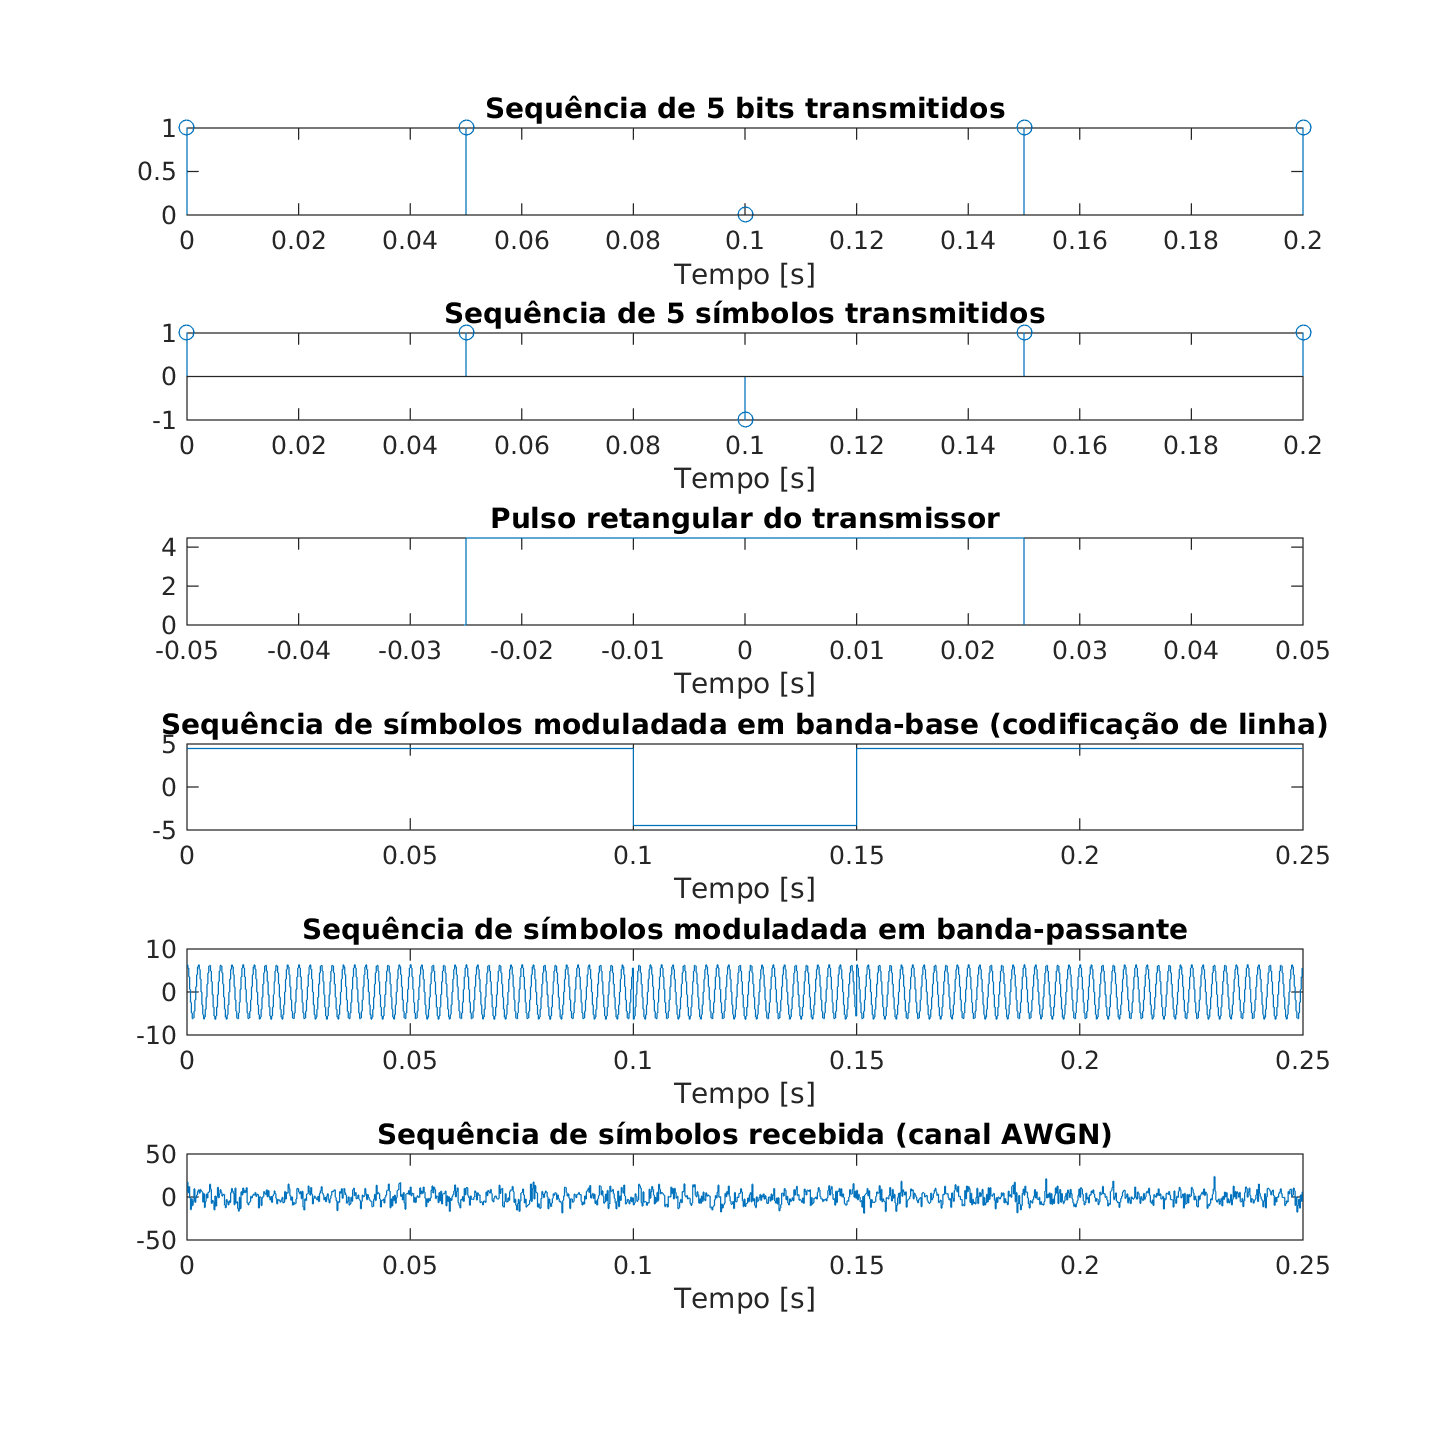

In [24]:
close all;clc;clear all;
% Parâmetros
EbNo_dB = 20;                      % Eb/No da simulação (somente um valor)
EbNo = 10^(EbNo_dB/10);            % Eb/No em escala linear
% Transmitir 1 quadro de Na bits com nSamp amostras
Na = 1000;                         % Número de bits por quadro
nAmoSim = 256;                     % Número de amostras por símbolo 
T = 0.05;                          % Tempo de símbolo (duração do símbolo em seg/símbolo)
Ts = T / nAmoSim;                  % Tempo de amostragem do pulso (amostras/seg)
Ns = Na * nAmoSim;                 % Número de amostras
t = (0:Ns-1)*Ts;                   % Eixo do tempo 
% 
% Transmissor
vtSimbolos = [-1 1];               % Símbolos (BPSK)
vtBin = randi([0,1], 1, Na);       % Vetor com bits
% Energia do bit
Eb = sum(vtSimbolos*vtSimbolos') / length(vtSimbolos);  
vtTxSim = vtSimbolos(vtBin+1);     % Mapeamento bit para símbolo
% Codificação de linha (modulação em banda-base)
hT = 1/sqrt(T)*ones(1, nAmoSim);   % Pulso retangular do transmissor (NRZ)
% Aplicando o pulso a sequência de símbolos 
vtTxBB = conv(upsample(vtTxSim, nAmoSim), hT);        
vtTxBB = vtTxBB(1:Ns);             % Truncando para o número de amostras original 
% Modulação em banda-passante
fc = 400;                          % Frequência da portadora [Hz]
vtTxBP = vtTxBB .* sqrt(2) .* cos(2*pi*fc*t);  % Modulator (portadora de potência 1)
%
% Canal AWGN 
No = Eb/EbNo;
% Sinal recebido
vtRxBP =  vtTxBP + sqrt(1/Ts*No/2)*randn(1, length(vtTxBP)); 
%
% Gráficos
fig = figure;
fig.PaperUnits = 'inches';
fig.PaperPosition = [0 0 15 15];
nPontos = 5;                      % Plotar somente os nPontos iniciais
% Bits
subplot(6,1,1);
tBits = [0:nPontos-1]*Ts*nAmoSim;
stem(tBits,vtBin(1:nPontos));
title(['Sequência de ' num2str(nPontos) ' bits transmitidos']);
xlabel('Tempo [s]');
% 
% Símbolos
subplot(6,1,2);
tSim = [0:nPontos-1]*Ts*nAmoSim;
stem(tSim,vtTxSim(1:nPontos));
title(['Sequência de ' num2str(nPontos) ' símbolos transmitidos']);
xlabel('Tempo [s]');
%
% Pulso
subplot(6,1,3);
thT = [-nAmoSim/2:nAmoSim/2-1]*Ts;
stairs([thT(1)-Ts thT thT(end)+Ts],[0 hT 0]);
title('Pulso retangular do transmissor');
xlabel('Tempo [s]');
axis([-nAmoSim*Ts nAmoSim*Ts 0 1/sqrt(T)]);
%
% Codificador de linha (modulação em banda-base)
subplot(6,1,4);
tMod = [0:nPontos*nAmoSim-1]*Ts;
stairs(tMod,vtTxBB(1:nPontos*nAmoSim));
title('Sequência de símbolos moduladada em banda-base (codificação de linha)');
xlabel('Tempo [s]');
%
% Modulador em banda-passante
subplot(6,1,5);
stairs(tMod,vtTxBP(1:nPontos*nAmoSim));
title('Sequência de símbolos moduladada em banda-passante');
xlabel('Tempo [s]');
% Sinal recebido (canal AWGN)
subplot(6,1,6);
stairs(tMod,vtRxBP(1:nPontos*nAmoSim));
title('Sequência de símbolos recebida (canal AWGN)');
xlabel('Tempo [s]');
